In [1]:
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import json, csv
import matplotlib.pyplot as plt

C:\Users\Won\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
problems = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 8.0, 9.0, 10.0, 11.0, 12.0, 26.0, 65.0, 85.0, 94.0, 110.0, 149.0, 152.0, 157.0, 158.0, 181.0, 193.0, 237.0, 260.0, 316.0, 330.0, 427.0, 463.0, 475.0, 546.0, 697.0, 699.0, 753.0, 874.0, 912.0, 920.0, 924.0, 929.0, 931.0, 932.0, 934.0, 966.0, 977.0, 978.0, 991.0, 1156.0, 1163.0, 1178.0, 1193.0, 1231.0, 1292.0, 1293.0, 1294.0, 1309.0, 1438.0, 1439.0, 1440.0, 1441.0, 1442.0, 1443.0, 1444.0, 1445.0, 1446.0, 1455.0, 1475.0, 1490.0, 1557.0, 1558.0, 1562.0, 1576.0, 1577.0, 1579.0, 1581.0, 1588.0, 1606.0, 1609.0, 1667.0, 1675.0, 1739.0, 1741.0, 1742.0, 1743.0, 1747.0, 1748.0, 1750.0, 1751.0, 1753.0, 1775.0, 1839.0, 1869.0, 1884.0, 1902.0, 1908.0, 1920.0, 1941.0, 2046.0, 2052.0, 3344.0, 3673.0, 3948.0, 3963.0, 4622.0, 5064.0, 6287.0, 6576.0, 7393.0, 7958.0, 8012.0, 8095.0, 8461.0, 8465.0, 8498.0, 9039.0, 9171.0, 9172.0, 9250.0, 9430.0, 9718.0, 9797.0, 9799.0, 9808.0, 9809.0, 9817.0, 9818.0, 9828.0, 9844.0, 9845.0, 9869.0, 9871.0, 9872.0, 9950.0, 9951.0, 9952.0, 9953.0, 9989.0, 9998.0, 10004.0, 10021.0, 10022.0, 10047.0, 10050.0, 10051.0, 10052.0, 10053.0, 10057.0, 10399.0, 10403.0, 10650.0, 10654.0, 10718.0, 10719.0, 10720.0, 10721.0, 10724.0, 10726.0, 10727.0, 12458.0, 13501.0, 13502.0, 14552.0])
print(problems.shape)

(159,)


In [3]:
f = open('user_data.json')
json_data = json.load(f)
f.close()

# ranker 들의 푼 문제들 csv 파일로 저장
with open('user_data.csv', 'w', newline='') as file:
    # type : list -> dictionary
    for ranker in range(0,len(json_data)):
        dic = json.loads(json_data[ranker])
    
        writer = csv.writer(file)
        writer.writerow(dic["solving_problem"])
        
f = open('user_data.csv', 'r')

lines = csv.reader(f)

arr = np.zeros((len(json_data), 18005))

ranker_num = 0
for line in lines:    
    for idx in range(0, len(line)):
        arr[ranker_num][int(line[idx])-1000] = 1
    ranker_num += 1
    

In [4]:
df = pd.DataFrame(arr[3])
print(df)

         0
0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
...    ...
17975  0.0
17976  0.0
17977  0.0
17978  0.0
17979  0.0
17980  0.0
17981  0.0
17982  0.0
17983  0.0
17984  0.0
17985  0.0
17986  0.0
17987  0.0
17988  0.0
17989  0.0
17990  0.0
17991  0.0
17992  0.0
17993  0.0
17994  0.0
17995  0.0
17996  0.0
17997  0.0
17998  0.0
17999  0.0
18000  0.0
18001  0.0
18002  0.0
18003  0.0
18004  0.0

[18005 rows x 1 columns]


In [5]:
user = np.zeros(159)
print(user.shape)
print(len(problems))

(159,)
159


In [6]:
for idx in range(0,len(problems)):
    user[idx] = df[0][problems[idx]]

In [7]:
user

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [8]:
output = pd.DataFrame(columns=['Wrong Probability', 'Solving Probability'])
output

,Wrong Probability,Solving Probability


In [9]:
cnt = 0

# arr = np.full((159), 100)
arr = [[5, 0], [5, 0], [5, 0], [5, 0], [5, 0]]
# rec_problems = 
for idx in range(0, len(user)):
    #if user[idx]:
    #    continue
    model = joblib.load("model_" + str(int(problems[idx]) + 1000) + ".pkl")
    print(str(int(problems[idx])+1000) + "번 문제 : ", end='')
    print(model.predict_proba([user])[0])
    
    output.loc[int(problems[idx])+1000] = model.predict_proba([user])[0]

    
    for i in range(5):
        if(arr[i][0] > abs(model.predict_proba([user])[0][1] - model.predict_proba([user])[0][0])):
            for j in range(4, i, -1):
                arr[j][0] = arr[j-1][0]
                arr[j][1] = arr[j-1][1]
            arr[i][0] = abs(model.predict_proba([user])[0][1] - model.predict_proba([user])[0][0])
            arr[i][1] = problems[idx]
            break
    
    cnt += 1
print(cnt)

for i in range(5):
    print(arr[i][0], end='    ')
    print(arr[i][1])


1000번 문제 : [1.66041674e-17 1.00000000e+00]
1001번 문제 : [0.97803371 0.02196629]
1002번 문제 : [9.99999936e-01 6.40980473e-08]
1003번 문제 : [0.83259505 0.16740495]
1004번 문제 : [9.99999997e-01 2.58711417e-09]
1008번 문제 : [0.95270749 0.04729251]
1009번 문제 : [0.42252233 0.57747767]
1010번 문제 : [1.00000000e+00 5.48304081e-23]
1011번 문제 : [1.00000000e+00 5.50322826e-14]
1012번 문제 : [1.00000000e+00 1.75180529e-16]
1026번 문제 : [9.99998467e-01 1.53325259e-06]
1065번 문제 : [0.30717859 0.69282141]
1085번 문제 : [1.00000000e+00 1.83649572e-20]
1094번 문제 : [3.98762887e-06 9.99996012e-01]
1110번 문제 : [0.57614216 0.42385784]
1149번 문제 : [0.99858728 0.00141272]
1152번 문제 : [0.10839382 0.89160618]
1157번 문제 : [9.99994871e-01 5.12880286e-06]
1158번 문제 : [9.99044835e-01 9.55164970e-04]
1181번 문제 : [1.0000000e+00 1.7371188e-12]
1193번 문제 : [1.00000000e+00 2.26003401e-16]
1237번 문제 : [1.00000000e+00 1.13765797e-10]
1260번 문제 : [0.99417214 0.00582786]
1316번 문제 : [0.99240513 0.00759487]
1330번 문제 : [9.99998709e-01 1.29065845e-06]
1427번 문

In [10]:
output['GAP'] = np.nan
output['GAP'] = abs(output['Wrong Probability'] - output['Solving Probability'])
output

,Wrong Probability,Solving Probability,GAP
1000,1.660417e-17,1.000000e+00,1.000000
1001,9.780337e-01,2.196629e-02,0.956067
1002,9.999999e-01,6.409805e-08,1.000000
1003,8.325951e-01,1.674049e-01,0.665190
1004,1.000000e+00,2.587114e-09,1.000000
1008,9.527075e-01,4.729251e-02,0.905415
1009,4.225223e-01,5.774777e-01,0.154955
1010,1.000000e+00,5.483041e-23,1.000000
1011,1.000000e+00,5.503228e-14,1.000000
1012,1.000000e+00,1.751805e-16,1.000000


In [11]:
print((problems+1000).size)
print(output['GAP'].size)

159
159


C:\Users\Won\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


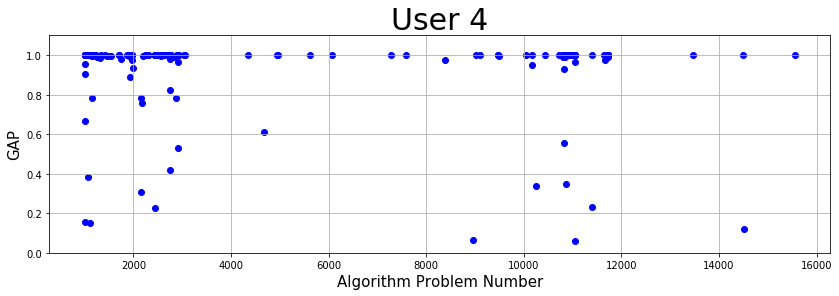

In [14]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.title('User 4', size = 30)
plt.ylabel('GAP', size = 15)
plt.xlabel('Algorithm Problem Number', size = 15)
plt.scatter(problems+1000, output['GAP'], color="blue")

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (14,4)

ax = fig.add_subplot(1,1,1)
#ax.set_xlim([800, 12000])
ax.set_ylim([0,1.1])

plt.show()